In [67]:
!pip3 install pandas scikit-learn matplotlib streamlit


[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: pip3 install --upgrade pip


In [68]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
RANDOM_STATE = 42

In [69]:
df = pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [70]:
print(df.info())
print(df.describe())
print(df.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000    

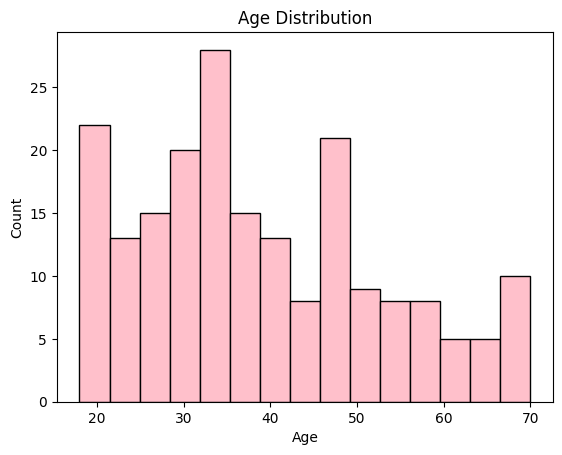

In [71]:
plt.hist(df["Age"], bins=15, edgecolor='black', color = 'pink')
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

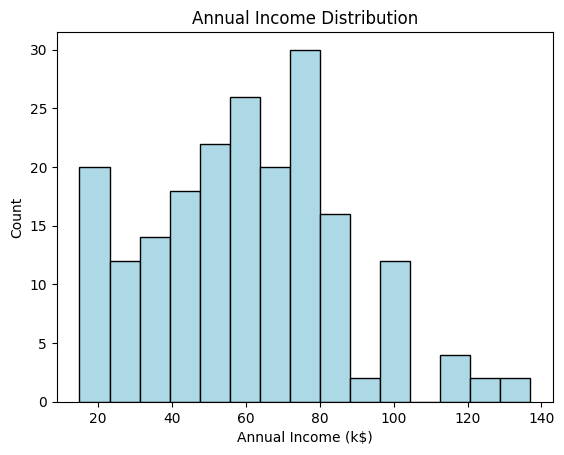

In [72]:
plt.hist(df["Annual Income (k$)"], bins=15, edgecolor='black', color = 'lightblue')
plt.title("Annual Income Distribution")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Count")
plt.show()

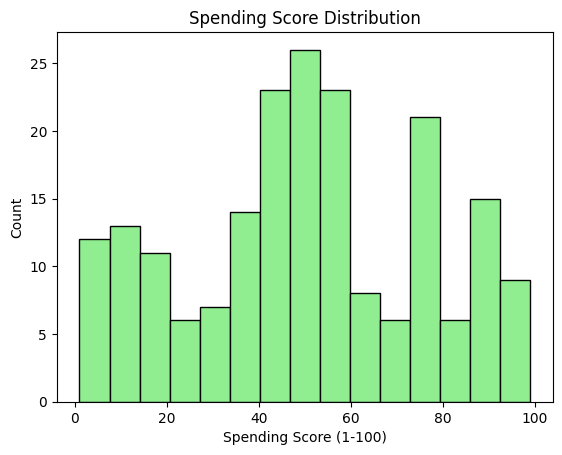

In [73]:
plt.hist(df["Spending Score (1-100)"], bins=15, edgecolor='black', color = 'lightgreen')
plt.title("Spending Score Distribution")
plt.xlabel("Spending Score (1-100)")
plt.ylabel("Count")
plt.show()

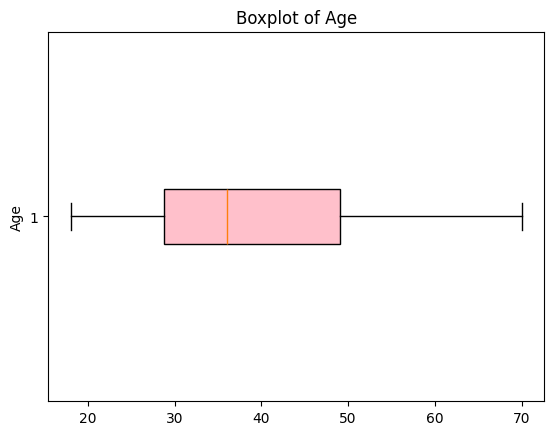

In [74]:
#Age
plt.boxplot(df["Age"], vert=False, patch_artist=True, boxprops=dict(facecolor='pink'))
plt.title("Boxplot of Age")
plt.ylabel("Age")
plt.show()

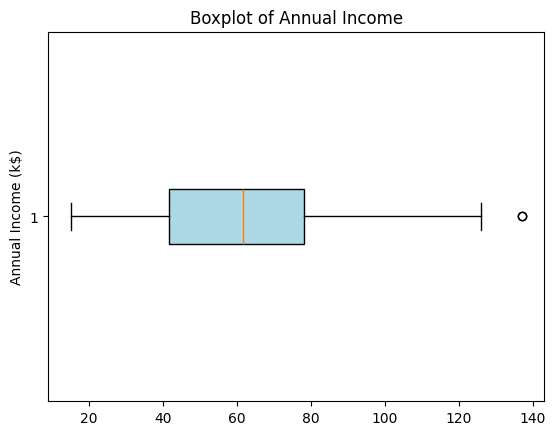

In [75]:
#Annual Income
plt.boxplot(df["Annual Income (k$)"], vert=False, patch_artist=True, boxprops=dict(facecolor='lightblue'))
plt.title("Boxplot of Annual Income")
plt.ylabel("Annual Income (k$)")
plt.show()

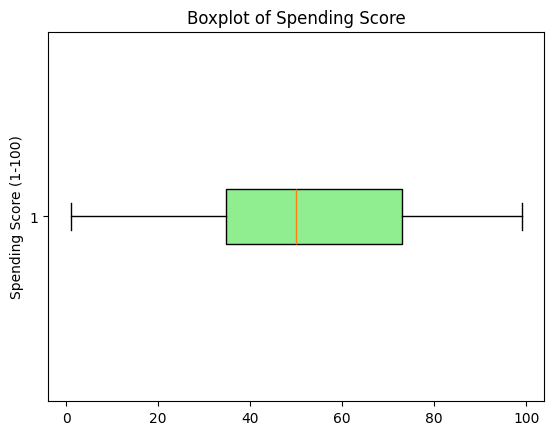

In [76]:
#Spending Score
plt.boxplot(df["Spending Score (1-100)"], vert=False, patch_artist=True, boxprops=dict(facecolor='lightgreen'))
plt.title("Boxplot of Spending Score")
plt.ylabel("Spending Score (1-100)")
plt.show()

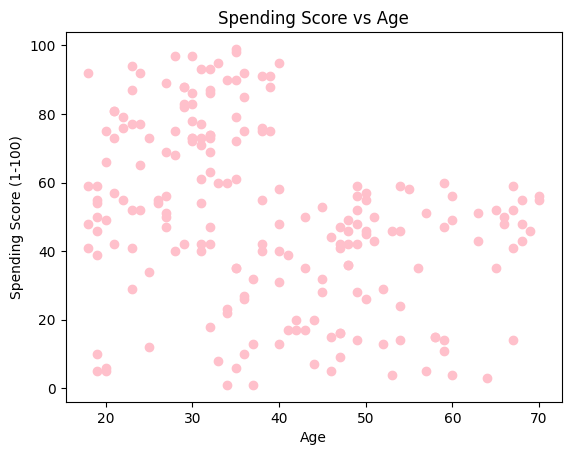

In [77]:
# Scatter plot of Spending Score vs Age
plt .scatter(df["Age"], df["Spending Score (1-100)"], color="pink")
plt.title("Spending Score vs Age")
plt.xlabel("Age")
plt.ylabel("Spending Score (1-100)")
plt.show()

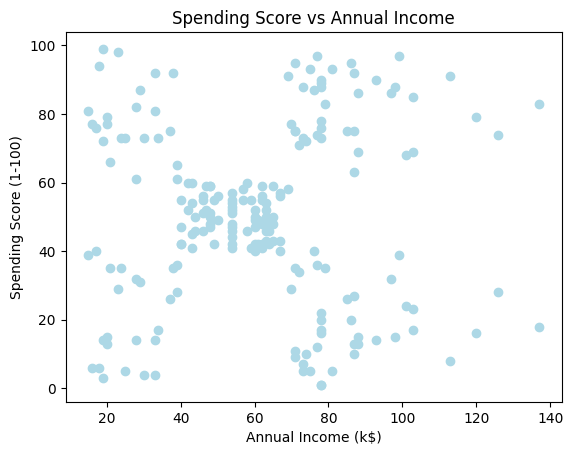

In [78]:
# Scatter plot of Spending Score vs Income
plt.scatter(df["Annual Income (k$)"], df["Spending Score (1-100)"], color="lightblue")
plt.title("Spending Score vs Annual Income")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.show()

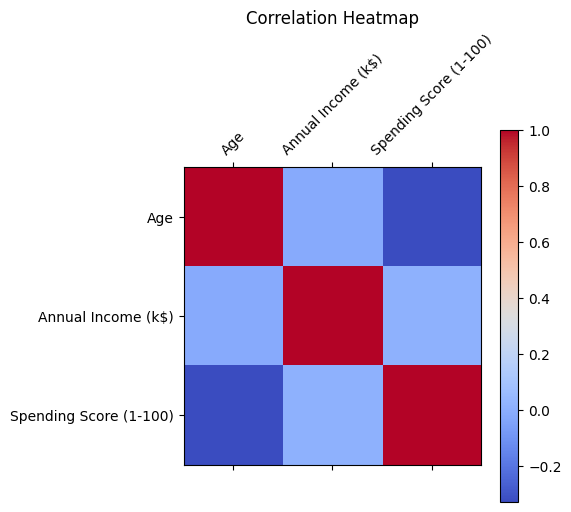

In [79]:
#Correlation heatmap 
corr = df[["Age", "Annual Income (k$)", "Spending Score (1-100)"]].corr()

plt.matshow(corr, cmap="coolwarm")
plt.colorbar()
plt.xticks(range(3), ["Age", "Income", "Spending"], rotation=45)
plt.yticks(range(3), ["Age", "Income", "Spending"])
plt.title("Correlation Heatmap")

# Set axis ticks and labels
plt.xticks(range(len(corr.columns)), corr.columns, rotation=45)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.show()

In [80]:
# Drop CustomerID (not useful for clustering) 
# Ignore Genre (categorical, not used in this simple K-Means example)
df_clean = df.drop(columns=["CustomerID", "Genre"])

# Select features for clustering
X = df_clean[["Age", "Annual Income (k$)", "Spending Score (1-100)"]]


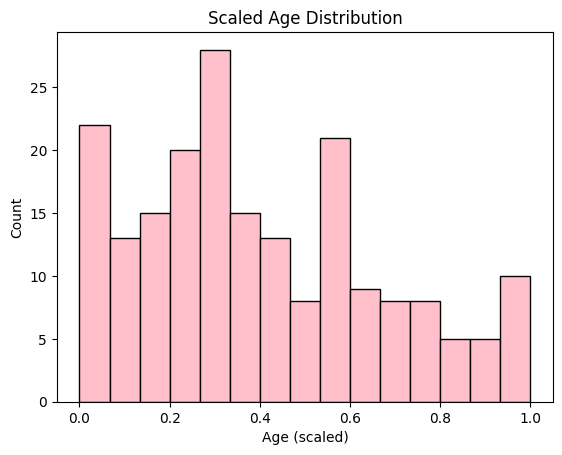

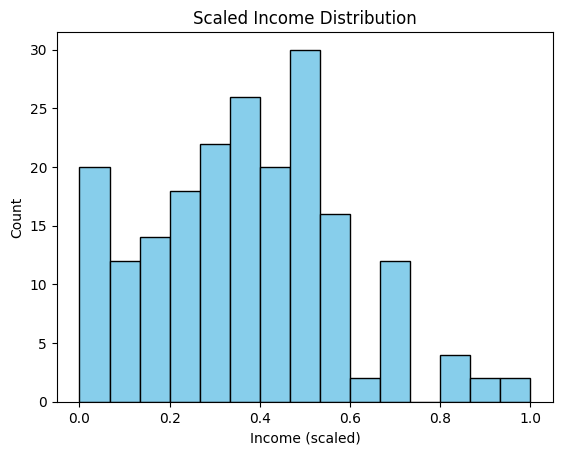

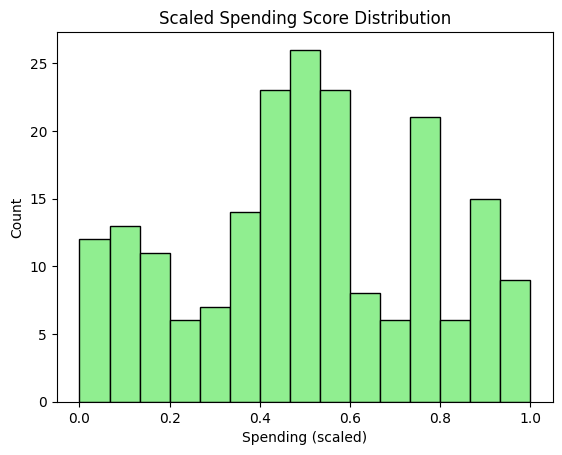

In [81]:
# Scale features with MinMaxScaler and plot histograms

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(df[["Age", "Annual Income (k$)", "Spending Score (1-100)"]])

# DataFrame for plotting
scaled_df = pd.DataFrame(
    X_scaled,
    columns=["Age (scaled)", "Income (scaled)", "Spending (scaled)"]
)

# Age (scaled)
plt.hist(scaled_df["Age (scaled)"], bins=15, color="pink", edgecolor="black")
plt.title("Scaled Age Distribution")
plt.xlabel("Age (scaled)")
plt.ylabel("Count")
plt.show()

# Income (scaled)
plt.hist(scaled_df["Income (scaled)"], bins=15, color="skyblue", edgecolor="black")
plt.title("Scaled Income Distribution")
plt.xlabel("Income (scaled)")
plt.ylabel("Count")
plt.show()

# Spending Score (scaled)
plt.hist(scaled_df["Spending (scaled)"], bins=15, color="lightgreen", edgecolor="black")
plt.title("Scaled Spending Score Distribution")
plt.xlabel("Spending (scaled)")
plt.ylabel("Count")
plt.show()

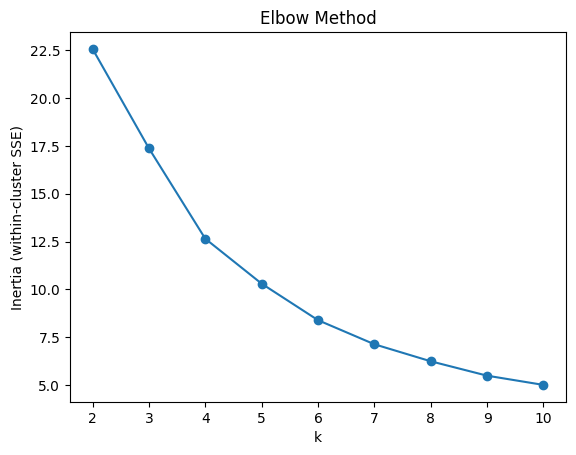

In [82]:
# Elbow method
inertias = []
K = range(2, 11)
for k in K:
    km = KMeans(n_clusters=k, n_init=10, random_state=RANDOM_STATE)
    km.fit(X_scaled)
    inertias.append(km.inertia_)

plt.plot(list(K), inertias, marker="o")
plt.xlabel("k"); plt.ylabel("Inertia (within-cluster SSE)")
plt.title("Elbow Method"); plt.show()

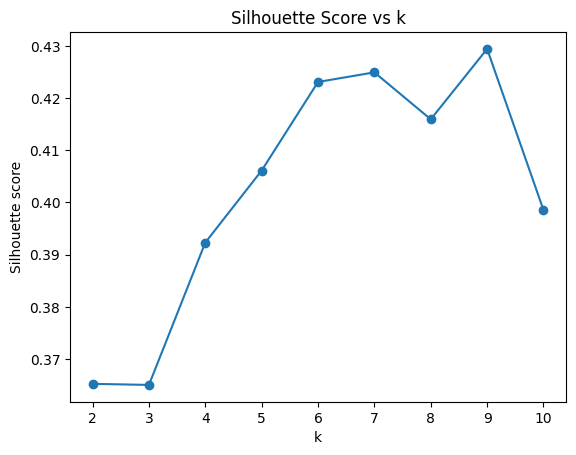

In [83]:
# Silhouette Score

sil_scores = []
for k in K:
    labels_k = KMeans(n_clusters=k, n_init=10, random_state=RANDOM_STATE).fit_predict(X_scaled)
    sil_scores.append(silhouette_score(X_scaled, labels_k))

plt.plot(list(K), sil_scores, marker="o")
plt.xlabel("k"); plt.ylabel("Silhouette score")
plt.title("Silhouette Score vs k"); plt.show()

In [84]:
# Fit KMeans with k=6 and add cluster labels

kmeans = KMeans(n_clusters=6, n_init=10, random_state=RANDOM_STATE)
labels = kmeans.fit_predict(X_scaled)

# Attach to original dataframe
df["Cluster"] = labels.astype(int)
df["Cluster"].head()


0    1
1    2
2    4
3    2
4    1
Name: Cluster, dtype: int64

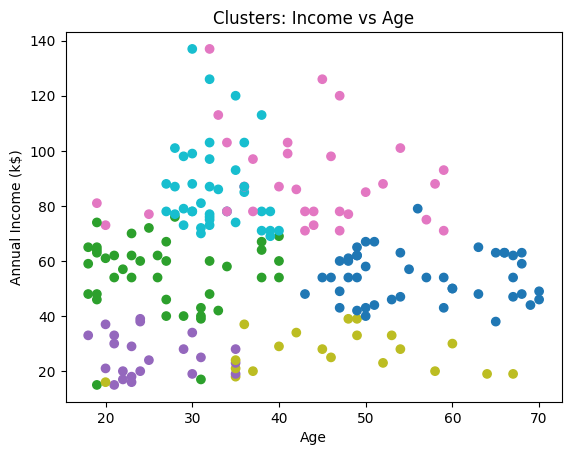

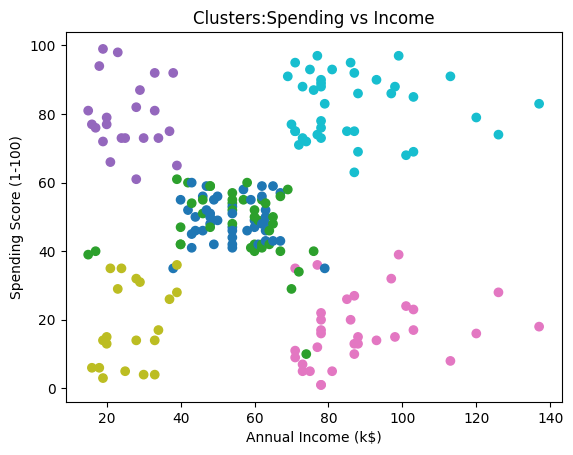

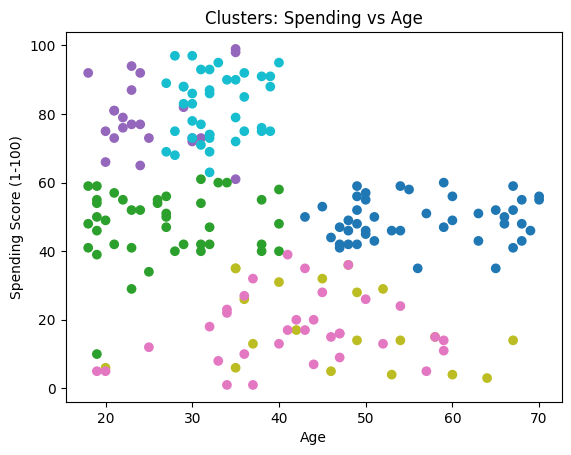

In [85]:
# Scatterplots of clusters
cols = ["Age", "Annual Income (k$)", "Spending Score (1-100)"]

# Income vs. Age
plt.scatter(df["Age"], df["Annual Income (k$)"], c=df["Cluster"], cmap="tab10")
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
plt.title("Clusters: Income vs Age")
plt.show()

# Spending vs Income
plt.scatter(df["Annual Income (k$)"], df["Spending Score (1-100)"], c=df["Cluster"], cmap="tab10")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("Clusters:Spending vs Income")
plt.show()

# Spending vs Age
plt.scatter(df["Age"], df["Spending Score (1-100)"], c=df["Cluster"], cmap="tab10")
plt.xlabel("Age")
plt.ylabel("Spending Score (1-100)")
plt.title("Clusters: Spending vs Age")
plt.show()

In [86]:
# Get cluster centers in original units (without scaling)

centers_scaled = kmeans.cluster_centers_

centers = pd.DataFrame(
    scaler.inverse_transform(centers_scaled),
    columns=["Age", "Annual Income (k$)", "Spending Score (1-100)"]
).round(0)

centers.index.name = "Cluster"
centers


,Age,Annual Income (k$),Spending Score (1-100)
Cluster,,,
0,56.0,54.0,49.0
1,27.0,55.0,48.0
2,25.0,26.0,79.0
3,42.0,89.0,17.0
4,46.0,27.0,18.0
5,33.0,87.0,82.0


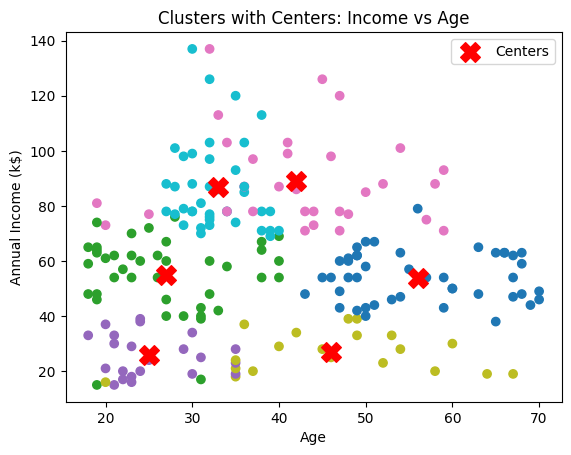

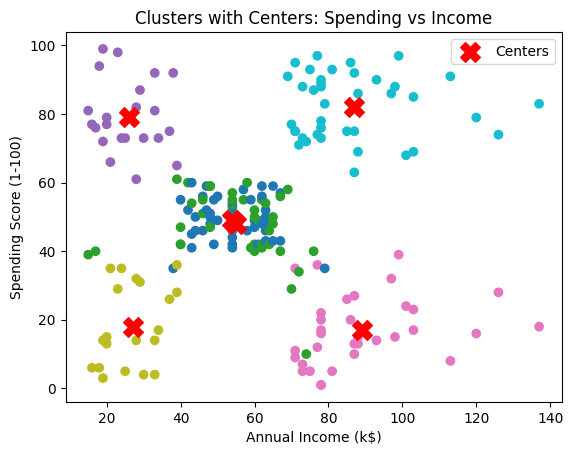

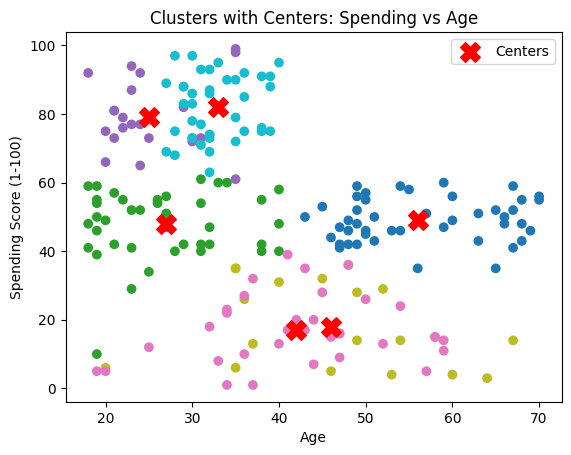

In [87]:
# Income vs Age with centers
plt.scatter(df["Age"], df["Annual Income (k$)"],
            c=df["Cluster"], cmap="tab10")
plt.scatter(centers["Age"], centers["Annual Income (k$)"],
            c="red", marker="X", s=200, label="Centers")
plt.xlabel("Age"); plt.ylabel("Annual Income (k$)")
plt.title("Clusters with Centers: Income vs Age")
plt.legend()
plt.show()

# Spending vs Income with centers
plt.scatter(df["Annual Income (k$)"], df["Spending Score (1-100)"],
            c=df["Cluster"], cmap="tab10")
plt.scatter(centers["Annual Income (k$)"], centers["Spending Score (1-100)"],
            c="red", marker="X", s=200, label="Centers")
plt.xlabel("Annual Income (k$)"); plt.ylabel("Spending Score (1-100)")
plt.title("Clusters with Centers: Spending vs Income")
plt.legend()
plt.show()

# Spending vs Age with centers
plt.scatter(df["Age"], df["Spending Score (1-100)"],
            c=df["Cluster"], cmap="tab10")
plt.scatter(centers["Age"], centers["Spending Score (1-100)"],
            c="red", marker="X", s=200, label="Centers")
plt.xlabel("Age"); plt.ylabel("Spending Score (1-100)")
plt.title("Clusters with Centers: Spending vs Age")
plt.legend()
plt.show()

In [89]:
# Average Age, Income, and Spending Score for each cluster

cluster_summary = df.groupby("Cluster")[["Age", "Annual Income (k$)", "Spending Score (1-100)"]].mean().round(0)
cluster_summary

,Age,Annual Income (k$),Spending Score (1-100)
Cluster,,,
0,56.0,54.0,49.0
1,27.0,55.0,48.0
2,25.0,26.0,79.0
3,42.0,89.0,17.0
4,46.0,27.0,18.0
5,33.0,87.0,82.0
